In [342]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [343]:
#Load the dataset
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [344]:
#preprocess the data
#drop irrelevant columns
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [345]:
#Encode categorical variable
label_encoder_gender = LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [346]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo = OneHotEncoder()
geo_encoder = onehot_encoder_geo.fit_transform(data[['Geography']])
geo_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [347]:
onehot_encoder_geo.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [348]:
(onehot_encoder_geo.categories_[0])

array(['France', 'Germany', 'Spain'], dtype=object)

In [349]:
geo_encoded_df = pd.DataFrame(geo_encoder.toarray(),columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [350]:
#combine one hot encoder columns with orginal data
data = pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)

In [351]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [352]:
#save the enoders and scaler
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

In [353]:
with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)

In [354]:
#Divide the data into independent and dependent features
X=data.drop('Exited',axis=1)
y=data['Exited']


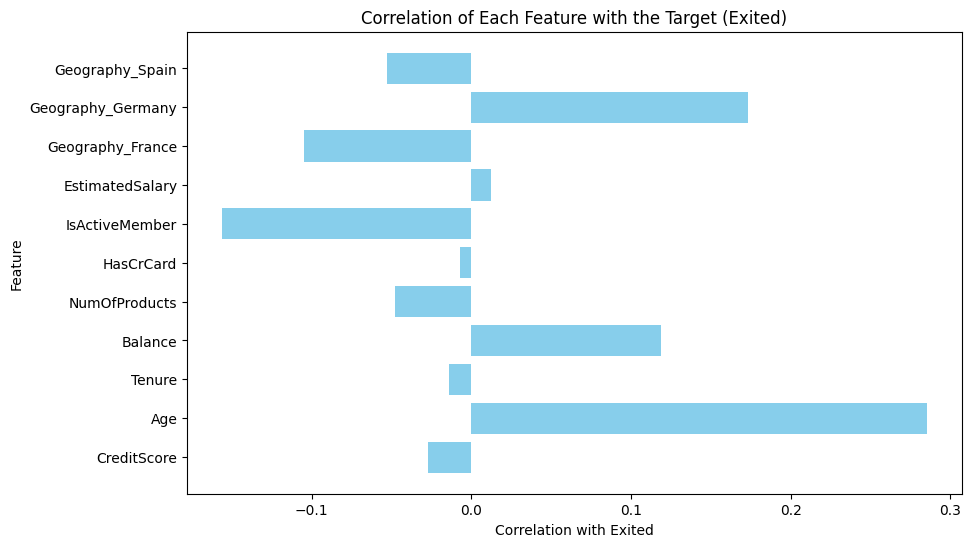

In [371]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
correlations = {}

# correlation between x and y
for column in X.columns:
    if X[column].dtype in ['int64', 'float64']:  
        corr, _ = pointbiserialr(X[column], y)
        correlations[column] = corr

# Convert the correlations to a DataFrame for easy plotting
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])

# Plot the correlations
plt.figure(figsize=(10, 6))
plt.barh(correlation_df['Feature'], correlation_df['Correlation'], color='skyblue')
plt.xlabel('Correlation with Exited')
plt.ylabel('Feature')
plt.title('Correlation of Each Feature with the Target (Exited)')
plt.show()


In [ ]:
#split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

#Scale the features
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [355]:
X_train.shape[1]

12

In [356]:
y_train = y_train.values
y_test = y_test.values


In [357]:
X_train
type(X_train)
(pd.DataFrame(X_train).head())

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.354768,0.911178,-0.184234,-1.382311,0.803783,0.815482,0.649397,0.970437,-1.223321,-0.99925,1.722862,-0.574848
1,0.302829,-1.097481,-0.279612,-0.692126,-1.231506,0.815482,0.649397,0.970437,-1.707560,1.00075,-0.580429,-0.574848
2,0.022355,-1.097481,-0.088856,0.343151,0.743835,0.815482,0.649397,0.970437,1.545096,-0.99925,-0.580429,1.739589
3,-0.330835,0.911178,1.627943,0.688244,-1.231506,-0.907671,0.649397,0.970437,0.737968,1.00075,-0.580429,-0.574848
4,-1.172256,0.911178,0.769543,1.723521,-1.231506,0.815482,-1.539890,0.970437,-1.302070,1.00075,-0.580429,-0.574848


In [358]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [359]:
# ANN Implementation

In [360]:
import tensorflow as tf

In [361]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [362]:
#build ann model

model = Sequential([
    Dense(64,activation='relu',input_shape = (X_train.shape[1],)),  ##HL1 connected with input layer
    Dense(32,activation = 'relu'), ##HL2
    Dense(1,activation='sigmoid') ## output layer
 
]
)

In [363]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                832       
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [364]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [365]:
## compile the model
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [366]:
## Set up Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorflow_callback = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [367]:
#Set up early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)


In [368]:
#Train the model
history = model.fit(
    X_train,y_train,validation_data = (X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.3924 - accuracy: 0.8416 - val_loss: 0.3699 - val_accuracy: 0.8530
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3517 - accuracy: 0.8533 - val_loss: 0.3703 - val_accuracy: 0.8545
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.8611 - val_loss: 0.3731 - val_accuracy: 0.8455
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3394 - accuracy: 0.8634 - val_loss: 0.3833 - val_accuracy: 0.8470
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8612 - val_loss: 0.3811 - val_accuracy: 0.8460
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3319 - accuracy: 0.8652 - val_loss: 0.3778 - val_accuracy: 0.8520
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3299 - accuracy: 0.8646 - val_loss: 0.3748 - val_accuracy: 0.8450

In [369]:
model.save('model.h5')

c:\Users\SHIVARAMAKRISHNAN\OneDrive - University at Buffalo\Summer 24\Gen AI Learning\ANN\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [372]:
#accuracy of the model
val_accuracy = history.history['val_accuracy'][-1]

In [374]:
print(f"The accuracy of the ANN Model is {val_accuracy * 100:.2f}%")

The accuracy of the ANN Model is 84.85%
